# APS 2 - Tranferências de Calor e Mecânica dos Sólidos

### Grupo 5

- Bruno Freitas do Nascimento Rodrigues
- Jonathan Sutton
- Keiya Nishio
- Nicolas Byung Kwan Cho

## Comportamento numérico

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Declaração de variáveis

Foram declaradas as variáveis mencionadas no enunciado do exercício. Além de declarados os valores de **dx** e **raio** para fins de teste.

In [57]:
den = 2700
Lx = 0.3
k = 180
c = 896
Tl = 25 
Tb = 100
Tamb = 50
h = 50
tol = 1e-10
alfa = k/(den*c)
dx = 0.01
raio = 12e-3


### Identificando a equação dos nós

Para o cálculo numérico na aleta foi utilizado o método das diferenças finitas na equação diferencial dada abaixo.

 $$\frac{d^2T}{dx^2} - \frac{hP}{kA_{tr}} (T - T_{\infty}) = \frac{1}{\alpha} \frac{dT}{dt} $$

Considerando a segunda derivada da 
temperatura no espaço uma equação de diferença finita centrada e a primeira derivada no tempo 
da temperatura uma equação de diferença progressiva, temos que:

$$\frac{d^2T}{dx^2} = \frac{T_{i+1}^l - 2T_{i}^l + T_{i-1}^l}{\Delta x^2}$$ 
$$\frac{dT}{dt} = \frac{T_{i}^{l+1} - T_{i}^l}{\Delta t} $$

Substituindo na primeira equação:

$$\frac{T_{i+1}^l - 2T_{i}^l + T_{i-1}^l}{\Delta x^2} - \frac{hP}{kA_{tr}} (T_{i}^l - T_{\infty}^l) = \frac{1}{\alpha} \frac{T_{i}^{l+1} - T_{i}^l}{\Delta t} $$

Isolando $T_{i}^{l+1}$:

$$T_{i}^{l+1} = \alpha \Delta t (\frac{T_{i+1}^l - 2T_{i}^l + T_{i-1}^l}{\Delta x^2} - \frac{hP}{kA_{tr}} (T_{i}^l - T_{\infty}^l)) + T_{i}^l$$

Essa será a equação a ser utilizada no método numérico

### Função e gráfico

Para determinar o gráfico da temperatura x posição, foi criada a função **calcula_aleta**. O $\Delta T$ foi calculado utilizando seu valor máximo na condição de estabilidade, seguindo a seguinte equação:

$$\Delta T = \frac{\Delta x^2}{\alpha (\frac{hP\Delta x^2}{kA_{tr}} + 2)} $$

In [58]:
def calcula_aleta(tempo_sim):
    P = 2*math.pi*raio
    Atr = math.pi*raio**2
    dt = dx**2/(alfa * (h*P*dx**2/(k*Atr) + 2))
    nt = int(tempo_sim/dx)            #passos 
    nx = int(Lx/dx)+1                 #nós
    T = np.zeros(shape=(nt,nx))
    T[:,0] = Tb
    T[:,nx-1] = 25
    for l in range(1,nt-1):
        for i in range(1,nx-1):
            T[l+1,i] = alfa*dt*(((T[l,i+1]-2*T[l,i]+T[l,i-1])/(dx**2)) - ((h*P)/(k*Atr))*(T[l,i] - Tamb)) + T[l,i]

              
        erro = np.amax(abs((T[l+1,i]-T[l,i])/T[l+1,i]))
        if tol>=erro:
            print('Convergiu!',l)
            break

    
    x = np.linspace(0.0,Lx,nx)
    T_all = np.array(T[nt-1,:])
    print(T[-1,:])
    plt.title("Temperatura por comprimento")
    plt.plot(x,T_all)
    plt.ylabel('Temperatura [°c]')
    plt.xlabel('Posicao [m]')
    plt.grid(True)
    plt.show()


Para uma análise de 10 segundos os valores finais na aleta estão na array abaixo. O gráfico pela posição na aleta também está representado.

[100.          96.14173264  92.49717258  89.04938396  85.78264016
  82.68160618  79.73229766  76.92071012  74.23431987  71.66021589
  69.18707305  66.80286454  64.49721758  62.258803    60.07796714
  57.94390945  55.84747255  53.7782282   51.72730065  49.68448548
  47.64098013  45.58665866  43.51258742  41.40857221  39.26534625
  37.07249426  34.82021444  32.49770728  30.09443163  27.59902584
  25.        ]


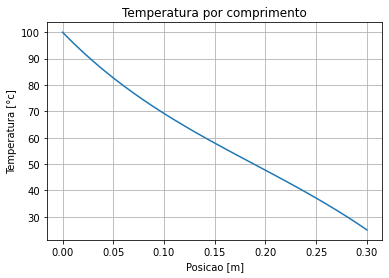

In [59]:
calcula_aleta(10)

## Comportamento analítico

Para validar o resultado obtido com o método numérico, foi analisado o comportamento analítico da temperatura na aleta, com as mesmas condições especificadas anteriormente. Como temos a temperatura na extremidade especificada, então utilizamos a seguinte expressão para determinar a temperatura ao longo da aleta:

$$ \frac { (\frac{\theta_{L}}{\theta_{b}}) senh(mx) + senh(m(L-x))}  {senh(mL)}$$

In [60]:
def t_analitico(x):
    P = 2*math.pi*raio
    Atr = math.pi*raio**2
    m=math.sqrt((h*P)/(k*Atr))
    thetal = Tl-Tamb
    thetab = Tb-Tamb
    T = ((thetal/thetab)*np.sinh(m*x) + np.sinh(m*(Lx-x))) / np.sinh(m*Lx)
    return T

**Gráfico do comportamento analítco**

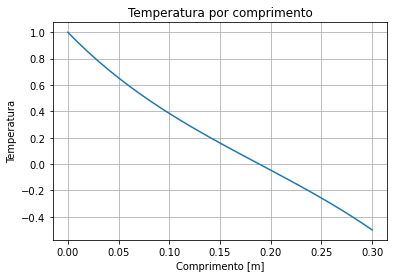

In [61]:
x = np.arange(0,Lx+dx,dx)
T_list = []
for i in x:
    T = t_analitico(i)
    T_list.append(T)

plt.title("Temperatura por comprimento")
plt.plot(x, T_list)
plt.xlabel("Comprimento [m]")
plt.ylabel("Temperatura")
plt.grid(True)
plt.show()

In [62]:
print(x)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3 ]


Comparando os dois gráficos, é possível perceber a similaridade na curva validando o resultado obtido numericamente